In [1]:
import ast

import numpy as np
import matplotlib.pyplot as plt
import ast

plt.style.use('ggplot')


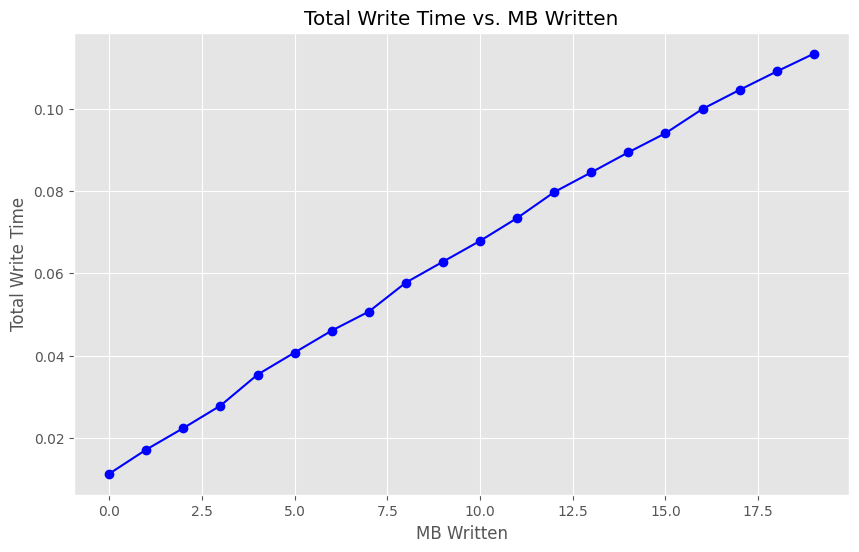

In [2]:
mb_written = []
total_write_time = []

# Read the data from the file
with open("./Scalability_single_client/write_log.txt", "r") as file:
    for line in file:
        parts = line.strip().split(", ")
        mb = float(parts[0])
        time = float(parts[1])
        mb_written.append(mb)
        total_write_time.append(time)

# Convert lists to numpy arrays for plotting
mb_written = np.array(mb_written)
total_write_time = np.array(total_write_time)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(mb_written, total_write_time, marker='o', linestyle='-', color='b')
plt.xlabel("MB Written")
plt.ylabel("Total Write Time")
plt.title("Total Write Time vs. MB Written")
plt.grid(True)

# Show the plot
plt.show()

In [14]:
x_values = []
y_values = []

# Open and read the file
with open("./Scalability_multiple_client/read_log_multiple_clients.txt", "r") as file:
    i = 0
    for line in file:
        i+=1
        if i > 11:
            break
        # Split each line by '|' and strip whitespace
        parts = [part.strip() for part in line.split('|')]
        
        # Parse the first part as the x-value (convert to int)
        x_value = int(parts[0])
        x_values.append(x_value)
        
        # Parse the second part as the y-values (convert to float)
        y_values_str = parts[-1]
        y_values_str = ast.literal_eval(y_values_str)
        y_values_float = [float(y[0]) for y in y_values_str]
        # Append the y-value to the list
        y_values.append(y_values_float)

In [4]:
y_values

[[39.938119411468506, 41.949626207351685],
 [101.54429221153259,
  103.58079409599304,
  113.72798562049866,
  119.77090525627136],
 [136.82847046852112,
  138.84262609481812,
  140.88118767738342,
  142.8945026397705,
  150.94089889526367,
  160.98552250862122],
 [177.31546139717102,
  181.4782829284668,
  185.57600951194763,
  185.61424612998962,
  189.6494061946869,
  191.65652990341187,
  197.68673634529114,
  207.72232174873352],
 [144.21039867401123,
  148.3806712627411,
  150.44502091407776,
  150.4610776901245,
  150.47088646888733,
  156.45301461219788,
  160.5148642063141,
  164.51385259628296,
  172.56399869918823,
  174.5646915435791],
 [243.1541657447815,
  244.84355926513672,
  245.17159461975098,
  248.72751235961914,
  249.01977849006653,
  251.0120279788971,
  251.01960015296936,
  251.06706976890564,
  256.7822742462158,
  258.7911202907562,
  259.0688409805298,
  267.10686469078064],
 [158.36240983009338,
  160.21124958992004,
  164.34260177612305,
  166.485278129577

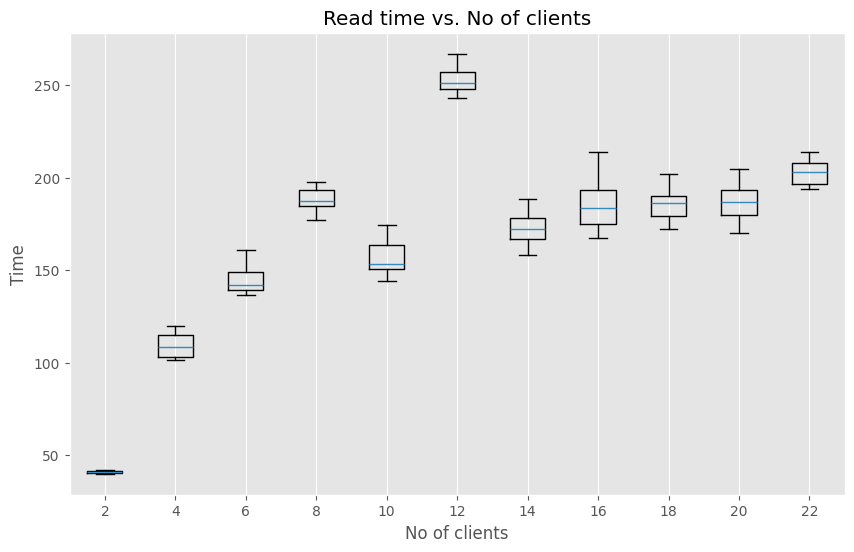

In [15]:
plt.figure(figsize=(10, 6))
plt.boxplot(y_values, labels=x_values, showfliers=False)
plt.xlabel("No of clients")
plt.ylabel('Time')
plt.title("Read time vs. No of clients")
plt.grid(axis="y")

# Show the plot
plt.show()

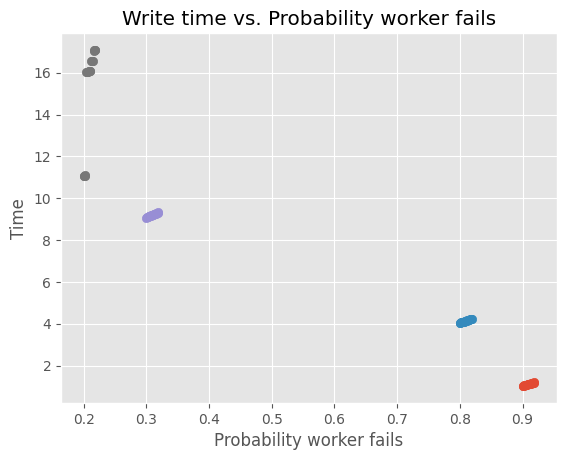

In [8]:
mb_written = []
total_write_time = []

data = {}
# Read the data from the file
with open("./Worker_Fault_Tolerance/write_log.txt", "r") as file:
    for line in file:
        parts = line.strip().split("|")
        
        prob = float(parts[0])
        
        total_time = float(parts[1])
        indiv_time = ast.literal_eval(parts[2])
        
        data[prob] = indiv_time

for probability, times in data.items():
    # Add a small incremental offset to the x-values for each probability
    x_values = [probability + i * 0.001 for i in range(len(times))]
    plt.scatter(x_values, times, label=f'Probability {probability}')

# Adding labels and legend
plt.xlabel('Probability worker fails')
plt.ylabel('Time')
plt.title('Write time vs. Probability worker fails')
plt.grid(True)

# Show the plot
plt.show()

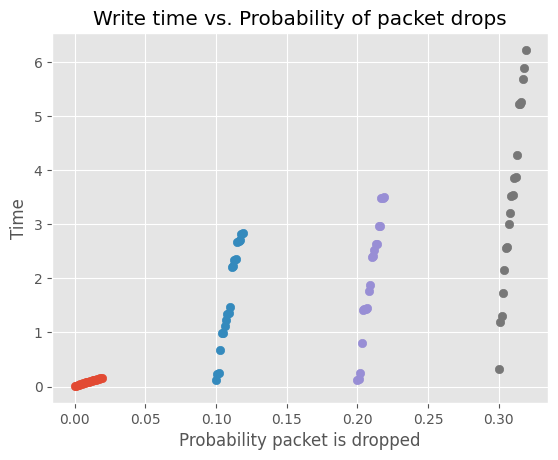

In [13]:
mb_written = []
total_write_time = []

data = {}
# Read the data from the file
with open("./Packet_drops/write_log.txt", "r") as file:
    for line in file:
        parts = line.strip().split("|")
        
        prob = float(parts[0])
        
        if prob > 0.3:
            continue
        
        total_time = float(parts[1])
        indiv_time = ast.literal_eval(parts[2])
        
        data[prob] = indiv_time

for probability, times in data.items():
    # Add a small incremental offset to the x-values for each probability
    x_values = [probability + i * 0.001 for i in range(len(times))]
    plt.scatter(x_values, times, label=f'Probability {probability}')

# Adding labels and legend
plt.xlabel('Probability packet is dropped')
plt.ylabel('Time')
plt.title('Write time vs. Probability of packet drops')
plt.grid(True)

# Show the plot
plt.show()